In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization

from keras import backend as K
K.set_image_dim_ordering('th')
from keras.callbacks import ModelCheckpoint
from keras.callbacks import LearningRateScheduler

from keras.preprocessing.image import ImageDataGenerator

from keras.utils import np_utils


from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split

/Users/rosscheung/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/rosscheung/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [5]:
y_train = df_train['label']
X_train = df_train.drop('label', axis=1).as_matrix()

In [6]:
X_test = df_test.as_matrix()

In [7]:
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')
X_train = X_train / 255
X_test = X_test / 255



In [8]:
X_test.shape

(28000, 1, 28, 28)

In [9]:
y_train = np_utils.to_categorical(y_train)



In [10]:
num_classes = 10

In [11]:

#(X_train, y_train), (X_test, y_test) = mnist.load_data()
#X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
#X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')
#X_train = X_train / 255
#X_test = X_test / 255

#y_train = np_utils.to_categorical(y_train)
#y_test = np_utils.to_categorical(y_test)
#num_classes = y_test.shape[1]




## Image Augmentation

For some examples of the image augmentation you can do, see below link. 

https://machinelearningmastery.com/image-augmentation-deep-learning-keras/

In [12]:
datagen = ImageDataGenerator(zoom_range = 0.1,
                            height_shift_range = 0.1,
                            width_shift_range = 0.1,
                            rotation_range = 10)
#                            featurewise_center=True, 
#                            featurewise_std_normalization=True,
#                            zca_whitening=True)
datagen.fit(X_train)

#datagen = ImageDataGenerator(rotation_range=90, 
#    featurewise_center=True, featurewise_std_normalization=True, zca_whitening=True)



In [13]:
#from keras.optimizers import SGD

#sgd = SGD(lr=0.1, momentum=0.9, decay=0.0001, nesterov=False)





In [14]:
from keras.optimizers import SGD

def larger_model():
    model = Sequential()
    model.add(Conv2D(30, (5, 5), input_shape=(1, 28, 28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(15, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    sgd = SGD(lr=0.01, decay=1e-4, momentum=0.9, nesterov=False)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

In [15]:
### Sample composite of layers others are using

#from keras.optimizers import SGD

def even_larger_model():
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu'))
    model.add(BatchNormalization())    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization())    
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization())    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    
    #sgd = SGD(lr=0.01, decay=1e-4, momentum=0.9, nesterov=False)
    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model

In [16]:
### Model layer taken from here: https://www.kaggle.com/toregil/welcome-to-deep-learning-cnn-99
#model = Sequential()
#model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu',
#                 input_shape = (28, 28, 1)))
#model.add(BatchNormalization())
#model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu'))
#model.add(BatchNormalization())
#model.add(MaxPool2D(strides=(2,2)))
#model.add(Dropout(0.25))
#model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
#model.add(BatchNormalization())
#model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
#model.add(BatchNormalization())
#model.add(MaxPool2D(strides=(2,2)))
#model.add(Dropout(0.25))
#model.add(Flatten())
#model.add(Dense(512, activation='relu'))
#model.add(Dropout(0.25))
#model.add(Dense(1024, activation='relu'))
#model.add(Dropout(0.5))
#model.add(Dense(10, activation='softmax'))


### Model taken from here: https://www.kaggle.com/yassineghouzam/introduction-to-cnn-keras-0-997-top-6
#model = Sequential()
#model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
#                 activation ='relu', input_shape = (28,28,1)))
#model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
#                 activation ='relu'))
#model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Dropout(0.25))
#model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
#                 activation ='relu'))
#model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
#                 activation ='relu'))
#model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
#model.add(Dropout(0.25))
#model.add(Flatten())
#model.add(Dense(256, activation = "relu"))
#model.add(Dropout(0.5))
#model.add(Dense(10, activation = "softmax"))



In [17]:
checkpoint = ModelCheckpoint('weights.best.hdf5', monitor='val_acc', save_best_only=True, mode='max')
#callbacks_list = [checkpoint]


In [18]:
x_train_small, x_val, y_train_small, y_val = train_test_split(X_train, y_train, test_size = 0.1)

In [19]:
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)


#learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
#                                            patience=3, 
#                                            verbose=1, 
#                                            factor=0.5, 
#                                            min_lr=0.00001)


In [20]:
#model = larger_model()
model = even_larger_model()
#history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
#scores = model.evaluate(X_test, y_test, verbose=0)


#history = model.fit(X_train, y_train, validation_split = 0.1, epochs=20, batch_size=200, callbacks=callbacks_list)


#history =  model.fit_generator(datagen.flow(X_train, y_train, batch_size=32), epochs=20, callbacks=callbacks_list)
history =  model.fit_generator(datagen.flow(x_train_small, y_train_small), 
                               validation_data= (x_val, y_val), epochs=30, callbacks=[checkpoint, annealer])#callbacks=[annealer, checkpoint])

#history =  model.fit_generator(datagen.flow(X_train, y_train), epochs=10, callbacks=[checkpoint])


scores = model.evaluate(x_val, y_val, verbose=0)
print(scores)


Epoch 1/30
1182/1182 [==============================] - 218s 184ms/step - loss: 0.4115 - acc: 0.8713 - val_loss: 0.0771 - val_acc: 0.9748
Epoch 2/30
1182/1182 [==============================] - 213s 180ms/step - loss: 0.1499 - acc: 0.9563 - val_loss: 0.0485 - val_acc: 0.9860
Epoch 3/30
1182/1182 [==============================] - 212s 179ms/step - loss: 0.1216 - acc: 0.9659 - val_loss: 0.0389 - val_acc: 0.9886
Epoch 4/30
1182/1182 [==============================] - 212s 179ms/step - loss: 0.1004 - acc: 0.9725 - val_loss: 0.0292 - val_acc: 0.9917
Epoch 5/30
1182/1182 [==============================] - 211s 179ms/step - loss: 0.0866 - acc: 0.9758 - val_loss: 0.0446 - val_acc: 0.9864
Epoch 6/30
1182/1182 [==============================] - 210s 177ms/step - loss: 0.0737 - acc: 0.9790 - val_loss: 0.0218 - val_acc: 0.9945
Epoch 7/30
1182/1182 [==============================] - 203s 172ms/step - loss: 0.0691 - acc: 0.9802 - val_loss: 0.0252 - val_acc: 0.9936
Epoch 8/30
1182/1182 [============

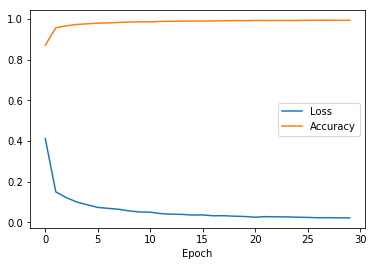

In [21]:
# Info on past runs: 
# Using 20 epochs, no image data generato
#37800/37800 [==============================] - 52s 1ms/step - loss: 0.0195 - acc: 0.9939 - val_loss: 0.0267 - val_acc: 0.9921

# Even bigger model with "only" 10 epochs!
#Epoch 10/10
#1182/1182 [==============================] - 231s 195ms/step - loss: 0.0568 - acc: 0.9823 - val_loss: 0.0245 - val_acc: 0.9917
#[0.024522902995678515, 0.9916666666666667]

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['acc'], label='Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

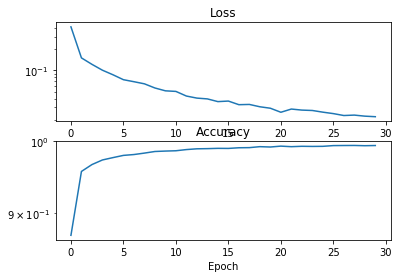

In [22]:
plt.subplot(2,1,1)
plt.semilogy(history.history['loss'], label='Loss')
plt.title('Loss')
plt.subplot(2,1,2)
plt.semilogy(history.history['acc'], label='Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')

plt.show()

In [ ]:
plt.subplot(2,1,1)
plt.semilogy(history.history['loss'], label='Loss')
plt.title('Loss')
plt.subplot(2,1,2)
plt.semilogy(history.history['acc'], label='Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
#plt.legend()

plt.show()

In [23]:
y_pred =np.argmax(model.predict(x_val),axis = 1) 
y_true = np.argmax(y_val, axis=1)
confusion_matrix(y_true, y_pred)

array([[391,   0,   1,   0,   0,   0,   0,   0,   1,   0],
       [  0, 466,   0,   0,   0,   0,   0,   1,   0,   0],
       [  0,   0, 405,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 428,   0,   1,   0,   1,   1,   1],
       [  0,   0,   0,   0, 436,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 375,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   1, 424,   0,   0,   0],
       [  0,   0,   0,   0,   1,   0,   0, 457,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 409,   0],
       [  0,   0,   0,   0,   2,   0,   0,   0,   1, 397]])

In [24]:
y_test = model.predict(X_test)

In [25]:
y_test

array([[3.3603197e-15, 1.1698284e-14, 1.0000000e+00, ..., 5.2563953e-10,
        9.1805306e-11, 1.0614852e-12],
       [9.9999762e-01, 2.1176656e-11, 1.1817222e-07, ..., 7.8301349e-10,
        2.7339984e-08, 2.2810161e-07],
       [3.5126986e-09, 8.7889723e-11, 4.3306101e-09, ..., 9.7708082e-08,
        9.9346289e-06, 9.9997663e-01],
       ...,
       [7.9364499e-27, 3.2756042e-19, 6.1118714e-17, ..., 3.1226833e-19,
        1.6997332e-16, 2.0173053e-16],
       [1.5951722e-09, 1.3073601e-11, 4.8700416e-10, ..., 3.4446241e-08,
        2.7993810e-08, 9.9999487e-01],
       [4.6157360e-17, 1.5739765e-16, 1.0000000e+00, ..., 9.5689142e-12,
        3.8707657e-12, 2.7163759e-14]], dtype=float32)

In [26]:
y_test_digits = np.argmax(y_test,axis = 1) 
y_test_digits

array([2, 0, 9, ..., 3, 9, 2])

In [27]:
#ImageId,Label


y_output = pd.Series(y_test_digits,name="Label")
df_output= pd.concat([pd.Series(data=range(1,28001), name='ImageId'), y_output], axis=1)
df_output.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


In [28]:
df_output.to_csv("CNN_MNIST.csv",index=False)
